# *Bankruptcy Predictor*

## - Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## - Reading the dataset

In [2]:
df = pd.read_csv('data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## - Checking for null values 

In [3]:
np.isnan(df.values).any()

False

## Analysing the dataframe , we can see that majority of the columns are scaled in a range of 0 to 1

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## - Finding the correlations between the features
## - Sorting them in ascending order

In [5]:
corr_matrix = df.corr()

pd.options.display.max_rows = None
corr_matrix['Bankrupt?'].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

## - Correlation values ranges from -1 to 1 , in which values close to 1 are directly proportional to the target and values close to -1 are inversely proportional
## - Hence we are taking 5 values close to 1 and -1 respectively as our features

In [6]:
df_1 = df[[' Debt ratio %',' Current Liability to Assets',' Borrowing dependency',' Current Liability to Current Assets',' Liability to Equity',' Net worth/Assets',' ROA(C) before interest and depreciation before interest',' ROA(B) before interest and depreciation after tax',' ROA(A) before interest and % after tax',' Net Income to Total Assets']]
df_1.describe()

,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Net worth/Assets,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax,Net Income to Total Assets
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.113177,0.090673,0.374654,0.031506,0.280365,0.886823,0.505180,0.553589,0.558625,0.807760
std,0.053920,0.050290,0.016286,0.030845,0.014463,0.053920,0.060686,0.061595,0.065620,0.040332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.072891,0.053301,0.370168,0.018034,0.276944,0.851196,0.476527,0.527277,0.535543,0.796750
50%,0.111407,0.082705,0.372624,0.027597,0.278778,0.888593,0.502706,0.552278,0.559802,0.810619
75%,0.148804,0.119523,0.376271,0.038375,0.281449,0.927109,0.535563,0.584105,0.589157,0.826455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## - Splitting the dataset in a ratio of 80:20

In [7]:
from sklearn.model_selection import train_test_split
df_train_features,df_test_features,labels_train,labels_test = train_test_split(df_1,df['Bankrupt?'],test_size=0.2,shuffle=True,stratify=df['Bankrupt?'],random_state=0)

## - Checking if we have a unbalanced dataset

In [8]:
from collections import Counter
print(Counter(labels_train),Counter(labels_test))

Counter({0: 5279, 1: 176}) Counter({0: 1320, 1: 44})


Text(0.5, 1.0, 'Before Sampling')

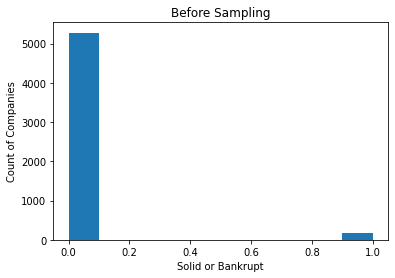

In [9]:
plt.hist(labels_train)
plt.xlabel('Solid or Bankrupt')
plt.ylabel('Count of Companies')
plt.title('Before Sampling')

## - As we can see our dataset is highly unbalanced , the ratio for target values 0 and 1 is 30:1 , hence we will have to balance the dataset 
## - We will balance the dataset using the imblearn library
## - We will oversample the '1' class and undersample the '0' class

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(sampling_strategy=0.5)
rus = RandomUnderSampler(sampling_strategy=0.8)
X_over , y_over = ros.fit_resample(df_train_features,labels_train)
X_sampled , y_sampled = rus.fit_resample(X_over,y_over)
print(Counter(y_over),Counter(y_sampled))

Counter({0: 5279, 1: 2639}) Counter({0: 3298, 1: 2639})


Text(0.5, 1.0, 'After over and under Sampling')

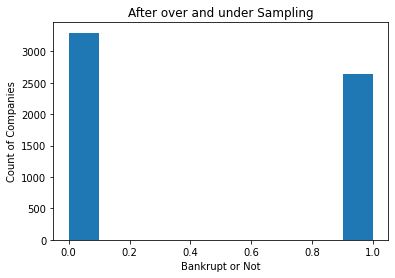

In [11]:
plt.hist(y_sampled)
plt.xlabel('Bankrupt or Not')
plt.ylabel('Count of Companies')
plt.title('After over and under Sampling')

## Now we are done with sampling , we can start with creating the models
### We will be using the following models :
- LogisticRegression
- KNN
- SVC
- Decision Trees
- Random Forest

## - Importing the models from sklearn

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## - We will be evaluating our model on the basis of accuracy and f1 score
## - Importing the metrics required

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score

## - Now we will try each model with the data we have and select the one with high accuracy and f1 score

# Logistic Regression

In [14]:
LRC = LogisticRegression()
LRC.fit(X_sampled,y_sampled)
y_pred_lrc = LRC.predict(df_test_features)
print(confusion_matrix(labels_test, y_pred_lrc),accuracy_score(labels_test, y_pred_lrc),f1_score(labels_test,y_pred_lrc))

[[1165  155]
 [  10   34]] 0.8790322580645161 0.2918454935622318


# KNN

In [15]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_sampled,y_sampled)
y_pred_knn = KNN.predict(df_test_features)
print(confusion_matrix(labels_test, y_pred_knn),accuracy_score(labels_test, y_pred_knn),f1_score(labels_test,y_pred_knn))

[[1278   42]
 [  29   15]] 0.9479472140762464 0.297029702970297


# SVC

In [16]:
svc = SVC()
svc.fit(X_sampled,y_sampled)
y_pred_svc = svc.predict(df_test_features)
print(confusion_matrix(labels_test, y_pred_svc),accuracy_score(labels_test, y_pred_svc),f1_score(labels_test,y_pred_svc))

[[1156  164]
 [  10   34]] 0.8724340175953079 0.2809917355371901


# Decision Tree Classifier

In [17]:
DTC = DecisionTreeClassifier()
DTC.fit(X_sampled,y_sampled)
y_pred_dtc = DTC.predict(df_test_features)
print(confusion_matrix(labels_test, y_pred_dtc),accuracy_score(labels_test, y_pred_dtc),f1_score(labels_test,y_pred_dtc))

[[1277   43]
 [  28   16]] 0.9479472140762464 0.3106796116504854


# Random Forest Classifier

In [18]:
RFC = RandomForestClassifier()
RFC.fit(X_sampled,y_sampled)
y_pred_rfc = RFC.predict(df_test_features)
print(confusion_matrix(labels_test,y_pred_rfc),accuracy_score(labels_test,y_pred_rfc),f1_score(labels_test,y_pred_rfc))

[[1289   31]
 [  27   17]] 0.9574780058651027 0.3695652173913044


In [19]:
print('Model_Name                  Accuracy            F1_Score')
print('Logistic_Regression        '+str(accuracy_score(labels_test, y_pred_lrc))+'   '+str(f1_score(labels_test,y_pred_lrc)))
print('KNN                        '+str(accuracy_score(labels_test, y_pred_knn))+'   '+str(f1_score(labels_test,y_pred_knn)))
print('SVC                        '+str(accuracy_score(labels_test, y_pred_svc))+'   '+str(f1_score(labels_test,y_pred_svc)))
print('Decision_Tree_Classifier   '+str(accuracy_score(labels_test, y_pred_dtc))+'   '+str(f1_score(labels_test,y_pred_dtc)))
print('Random_Forest_Classifier   '+str(accuracy_score(labels_test,y_pred_rfc))+'   '+str(f1_score(labels_test,y_pred_rfc)))

Model_Name                  Accuracy            F1_Score
Logistic_Regression        0.8790322580645161   0.2918454935622318
KNN                        0.9479472140762464   0.297029702970297
SVC                        0.8724340175953079   0.2809917355371901
Decision_Tree_Classifier   0.9479472140762464   0.3106796116504854
Random_Forest_Classifier   0.9574780058651027   0.3695652173913044


# As we can see random forest has highest accuracy and f1 score
# Now we will try fine tuning the model

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,20],'criterion':['gini', 'entropy'],'max_features':['sqrt', 'log2'],'max_depth':[10,50,100,150]}
RFC = RandomForestClassifier()
clf = GridSearchCV(RFC,parameters,scoring='f1',cv=5,verbose = 1,n_jobs = -1)
clf.fit(X_sampled,y_sampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 150],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20]},
             scoring='f1', verbose=1)

In [21]:
print(clf.best_estimator_)
print(clf.score(df_test_features,labels_test))

RandomForestClassifier(max_depth=150, max_features='sqrt', n_estimators=10)
0.3218390804597701


In [22]:
# Using some of the parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',n_estimators=10)
rfc.fit(X_sampled,y_sampled)
y_pred_rfc = rfc.predict(df_test_features)
print(confusion_matrix(labels_test,y_pred_rfc),accuracy_score(labels_test,y_pred_rfc),f1_score(labels_test,y_pred_rfc))

[[1290   30]
 [  28   16]] 0.9574780058651027 0.3555555555555555


## - Now we will run our model multiple times to get the best model possible
## - we will require pickle library to save the model 

In [23]:
import pickle

f1 = 0
for i in range(0,100):
    rfc = RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',n_estimators=20)
    rfc.fit(X_sampled,y_sampled)
    y_pred_rfc = rfc.predict(df_test_features)
    if (f1 < f1_score(labels_test,y_pred_rfc)) and (f1_score(labels_test,y_pred_rfc) > 0.4347):
        f1 = f1_score(labels_test,y_pred_rfc)
        pickle.dump(rfc, open("company_bankruptcy_predictor_2.pkl", "wb"))
    print('run '+ str(i) + ' f1 score = '+ str(f1_score(labels_test,y_pred_rfc)))
    i+=1      
print(f1)

run 0 f1 score = 0.41304347826086957
run 1 f1 score = 0.3655913978494624
run 2 f1 score = 0.37500000000000006
run 3 f1 score = 0.36170212765957455
run 4 f1 score = 0.39560439560439564
run 5 f1 score = 0.36170212765957455
run 6 f1 score = 0.3023255813953489
run 7 f1 score = 0.3695652173913044
run 8 f1 score = 0.3368421052631579
run 9 f1 score = 0.3913043478260869
run 10 f1 score = 0.38202247191011235
run 11 f1 score = 0.3555555555555555
run 12 f1 score = 0.3409090909090909
run 13 f1 score = 0.37362637362637363
run 14 f1 score = 0.3440860215053763
run 15 f1 score = 0.36363636363636365
run 16 f1 score = 0.38636363636363635
run 17 f1 score = 0.3913043478260869
run 18 f1 score = 0.3614457831325301
run 19 f1 score = 0.3636363636363637
run 20 f1 score = 0.37777777777777777
run 21 f1 score = 0.3555555555555555
run 22 f1 score = 0.33707865168539325
run 23 f1 score = 0.41666666666666663
run 24 f1 score = 0.3409090909090909
run 25 f1 score = 0.3440860215053763
run 26 f1 score = 0.3191489361702128

## - By running this step multiple times we get a model with 43% f1-score and 96% accuracy, now we will load this model


In [24]:
model = pickle.load(open("company_bankruptcy_predictor_2.pkl","rb"))
model

RandomForestClassifier(max_depth=50, max_features='log2', n_estimators=10)

In [25]:
print(confusion_matrix(labels_test,model.predict(df_test_features)),accuracy_score(labels_test,model.predict(df_test_features)),f1_score(labels_test,model.predict(df_test_features)))

[[1292   28]
 [  24   20]] 0.9618768328445748 0.43478260869565216


In [26]:
print('Model_Name                  Accuracy            F1_Score')
print('Random_Forest_Classifier   '+str(accuracy_score(labels_test,model.predict(df_test_features)))+'   '+str(f1_score(labels_test,model.predict(df_test_features))))

Model_Name                  Accuracy            F1_Score
Random_Forest_Classifier   0.9618768328445748   0.43478260869565216
